### Streaming History (audio, video, and podcasts)

A list of items (e.g. songs, videos, and podcasts) listened to or watched in the past year, including:

* Date and time of when the stream ended in UTC format (Coordinated Universal Time zone).
* Name of "creator" for each stream (e.g. the artist name if a music track).
* Name of items listened to or watched (e.g. title of music track or name of video). 
* “msPlayed”- Stands for how many mili-seconds the track was listened. 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]

**Load data**

In [5]:
data = pd.read_json("../data/StreamingHistory0.json",
                   convert_dates=['endTime'])

In [6]:
data.head()

,endTime,artistName,trackName,msPlayed
0,2020-04-18 20:54:00,Billie Eilish,all the good girls go to hell,94923
1,2020-04-19 16:49:00,Klaus Badelt,Eloi,0
2,2020-04-19 16:49:00,Klaus Badelt,Eloi,3620
3,2020-04-19 16:49:00,Hans Zimmer,Run Free,142333
4,2020-04-19 16:49:00,London Music Works,"No Time for Caution (From ""Interstellar"")",295


In [7]:
data.describe(include='all')

<ipython-input-7-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,endTime,artistName,trackName,msPlayed
count,6493,6493,6493,6.493000e+03
unique,4653,984,2010,NaN
top,2020-05-11 17:21:00,Arctic Monkeys,"This Land - From ""The Lion King""/Score",NaN
freq,39,585,75,NaN
first,2020-04-18 20:54:00,NaN,NaN,NaN
last,2021-04-17 11:38:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.426641e+05
std,NaN,NaN,NaN,1.969985e+05
min,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,5.610000e+03


**Missing values**

In [8]:
data.isna().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

**Add time columns**

In [48]:
data['year'] = data.endTime.dt.year
data['year_month'] = data.endTime.dt.to_period('M')
data['month'] = data.endTime.dt.month
data['year_month_day'] = data.endTime.dt.to_period('D')
data['hour'] = data.endTime.dt.hour

In [49]:
data.head()

,endTime,artistName,trackName,msPlayed,year,year_month,hour,year_month_day,month
0,2020-04-18 20:54:00,Billie Eilish,all the good girls go to hell,94923,2020,2020-04,20,2020-04-18,4
1,2020-04-19 16:49:00,Klaus Badelt,Eloi,0,2020,2020-04,16,2020-04-19,4
2,2020-04-19 16:49:00,Klaus Badelt,Eloi,3620,2020,2020-04,16,2020-04-19,4
3,2020-04-19 16:49:00,Hans Zimmer,Run Free,142333,2020,2020-04,16,2020-04-19,4
4,2020-04-19 16:49:00,London Music Works,"No Time for Caution (From ""Interstellar"")",295,2020,2020-04,16,2020-04-19,4


### General distributions

**Most popular artists**

<AxesSubplot:>

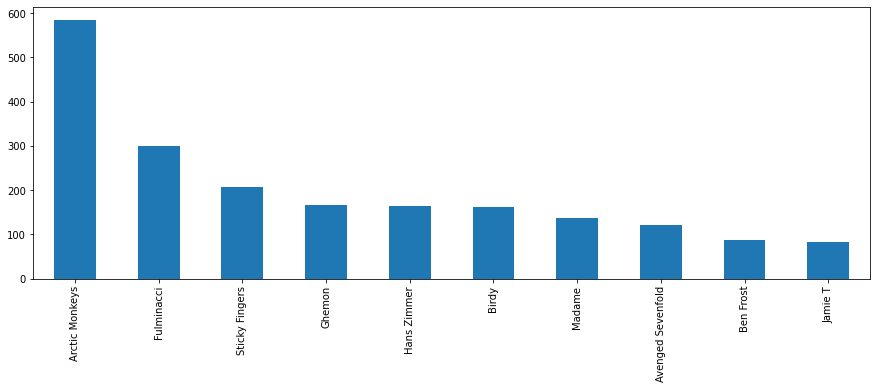

In [11]:
top_artists= data.artistName.value_counts().sort_values(ascending=False).head(10)
top_artists.plot(kind='bar')

Arctic monkeys and Fulminacci are the most popular over the last year. But what do their distribution over time look like? Is it stable or does it have peaks?

In [12]:
df = data[data.artistName.isin(top_artists.index)] \
        .groupby(['year_month', 'artistName']).count().msPlayed.reset_index()

<AxesSubplot:xlabel='year_month'>

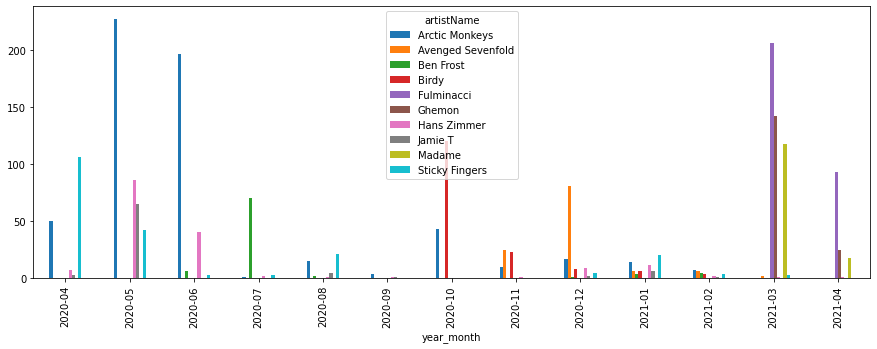

In [13]:
df.pivot(index="year_month", columns='artistName')['msPlayed'].fillna(0).plot(kind='bar')

**Most popular songs**

<AxesSubplot:>

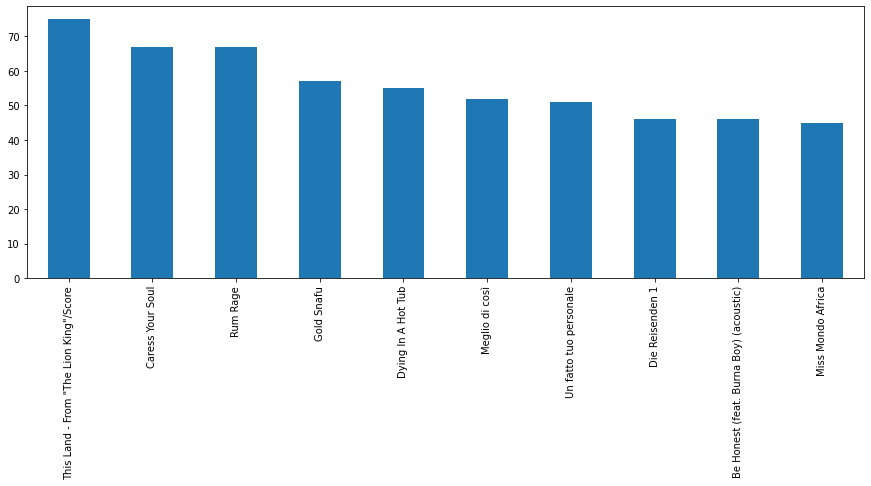

In [14]:
top_songs = data.trackName.value_counts().sort_values(ascending=False).head(10)
top_songs.plot(kind='bar')

In [15]:
df = data[data.trackName.isin(top_songs.index)] \
        .groupby(['year_month', 'trackName']).count().msPlayed.reset_index()

<AxesSubplot:xlabel='year_month'>

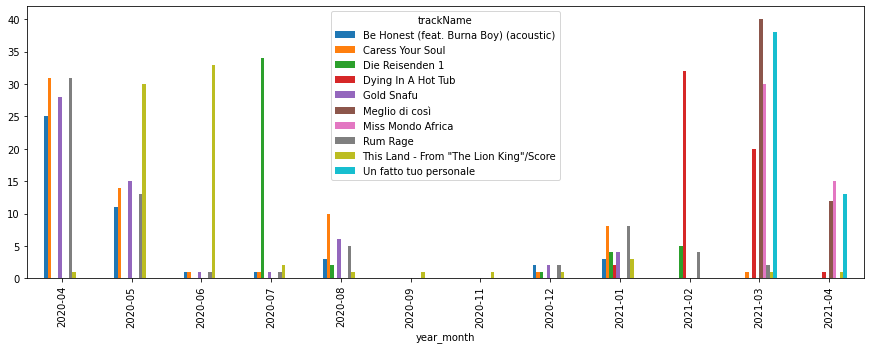

In [16]:
df.pivot(index="year_month", columns='trackName')['msPlayed'].fillna(0).plot(kind='bar')

**Most active months**

<AxesSubplot:>

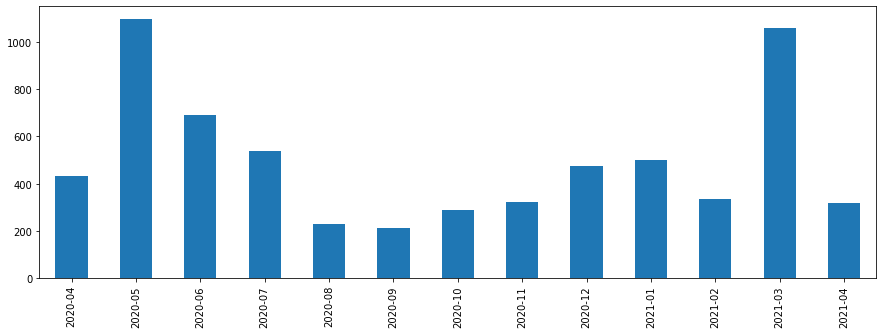

In [17]:
data.year_month.value_counts().sort_index(ascending=True).plot(kind='bar')

**Habits during spring semester in Denmark**

In [18]:
spring_semester_period = (data.year_month >= "2020-03") & (data.year_month <= "2020-06")

<AxesSubplot:>

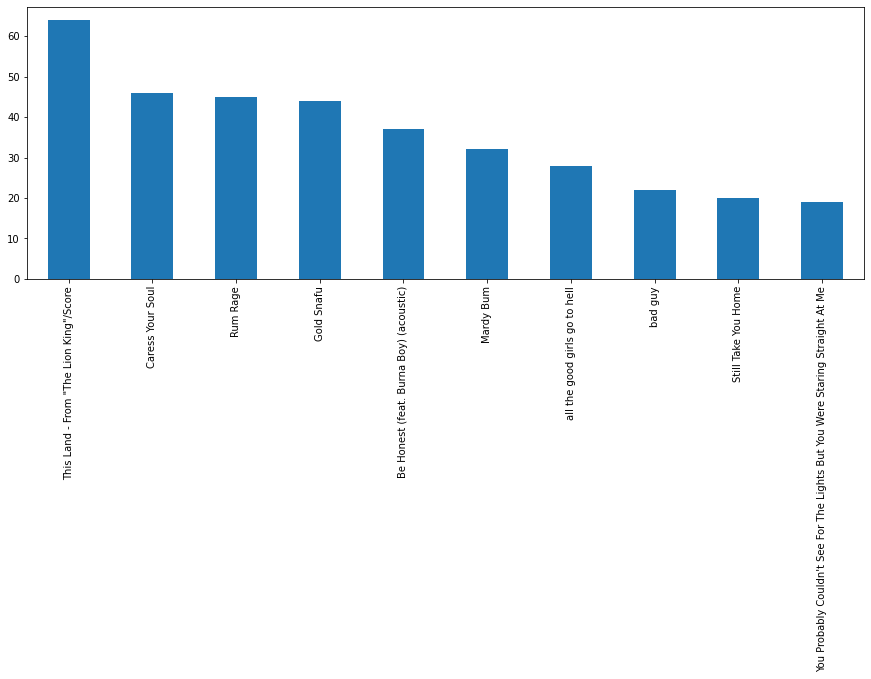

In [19]:
data[spring_semester_period].trackName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:>

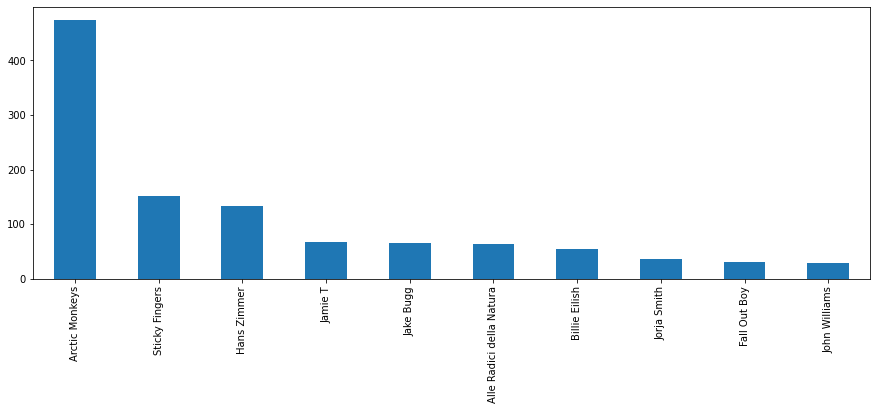

In [20]:
data[spring_semester_period].artistName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

**Habits during Sanremo**

In [21]:
sanremo_period = (data.year_month >= "2021-03") & (data.year_month <= "2021-03")

<AxesSubplot:>

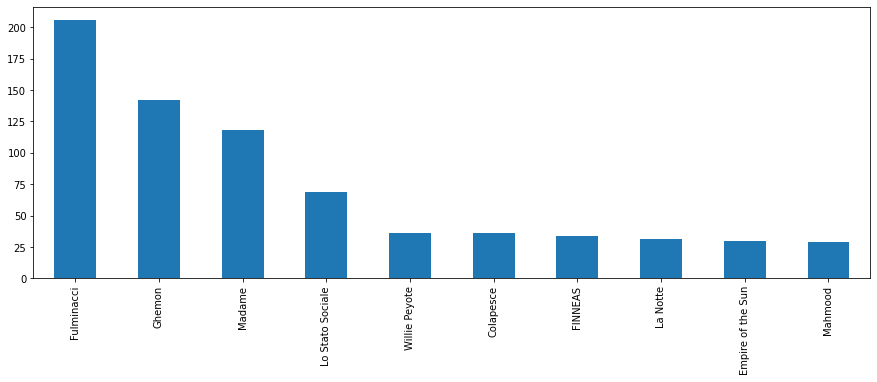

In [22]:
data[sanremo_period].artistName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:>

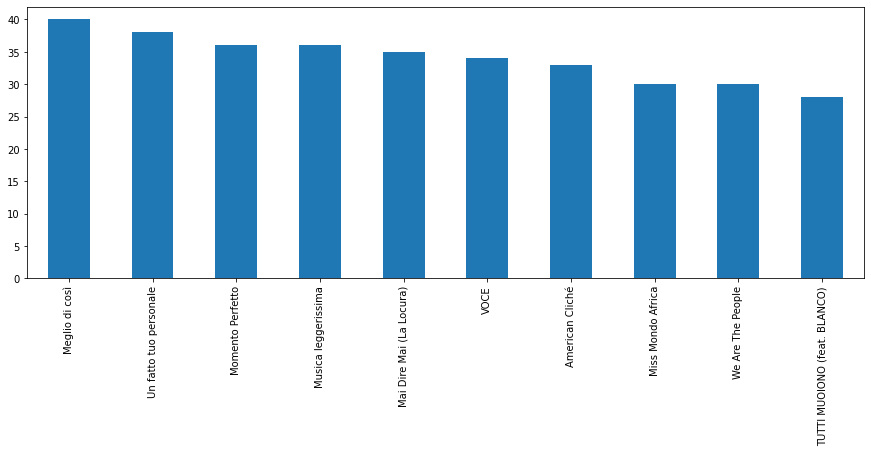

In [23]:
data[sanremo_period].trackName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

**Hometown Glory habits**

<AxesSubplot:>

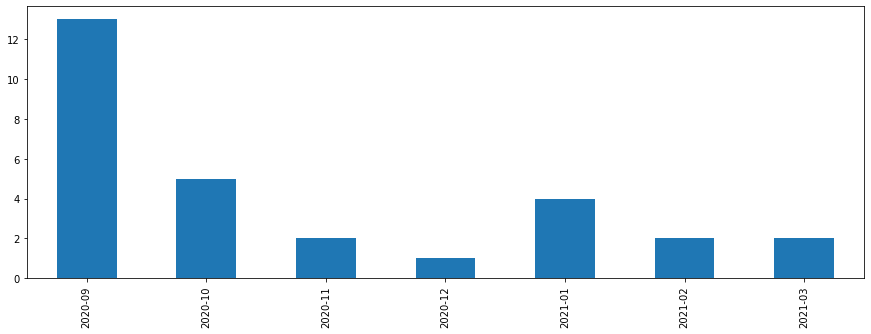

In [24]:
data[data.trackName.str.contains('Hometown Glory')]\
            .year_month.value_counts()\
                .sort_index(ascending=True).head(10).plot(kind='bar')

### First listen
When have we listened for the first time to artists in this last year?

<AxesSubplot:xlabel='year_month'>

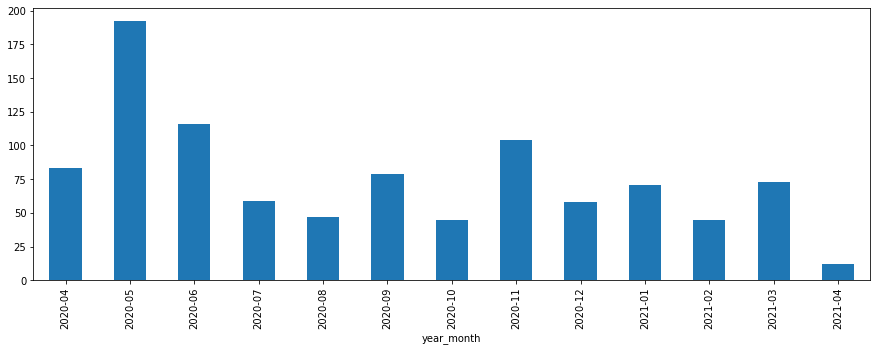

In [36]:
data.groupby("artistName").min().year_month.reset_index()\
    .groupby("year_month").count().artistName.sort_index().plot(kind="bar")

The distribution resambles the ones from the most active months. May has been the one with the most first listen, which fits with the fact that it is at the beginning of the period and a very active month. To be noticed that not all streams from April are available which may have caused many first listen to be detected in May.

### Hourly habits

<AxesSubplot:xlabel='hour'>

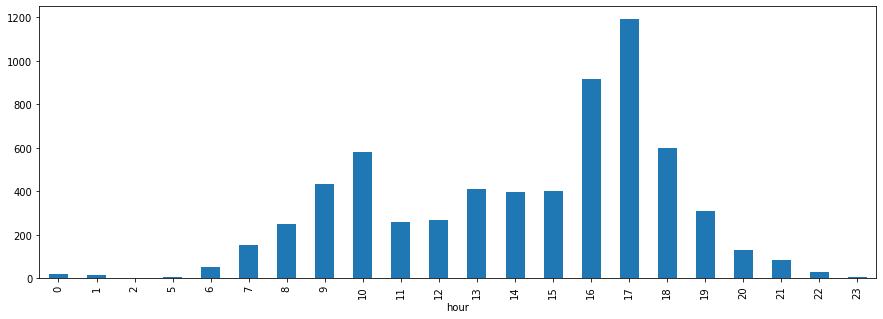

In [40]:
data.groupby("hour").endTime.count().plot(kind="bar")

Clearly the most active hours are 10 and 17. 17 could be due to training (after the university day was over) and 10 am could be due to days in which I studied with music.

Do these patterns change if we look at different periods of the year?

In [96]:
def mapDatetimeToPeriod(row):
    if (row.month >= 4) & (row.month <= 6):
        return 'Spring 2020'
    if (row.month >= 7) & (row.month <= 9):
        return 'Summer 2020'
    if (row.month >= 10) & (row.month <= 12):
        return 'Autumn 2020'
    if (row.month >= 1) & (row.month <= 3):
        return 'Winter 2021'

In [97]:
data['season'] = data.apply(lambda row: mapDatetimeToPeriod(row),axis=1)

In [98]:
df = None
for season in data.season.unique():
    new_df = data[data.season == season].groupby("hour").endTime.count().to_frame(season)
    if df is None:
        df = new_df
    else:
        df = df.merge(new_df, left_index=True, right_index=True)

<AxesSubplot:xlabel='hour'>

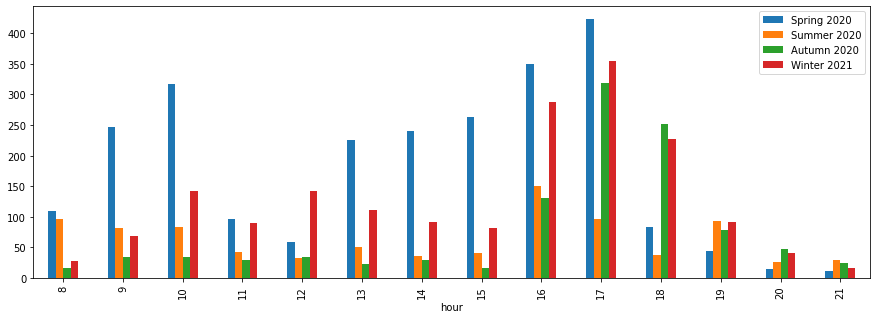

In [99]:
df.plot(kind='bar')

* It is clear that in Spring 2020, after listening to music both during studying (16) and training (17) the number of streams dropped. 
* On the other hand, this pattern cannot be observed in Autumn and Winter (during thesis) where the habits were to study up until 18 and then sometimes train afterwards. Indeed the streams dropped after 18, instead of 17 which is more aligned with danish habits.
* Generally, music is listened more at the end of the working/studying day, regardless of the period of the year. This can be to fight the increasing tiredness and as a result of a growing sense of being close to some time off

### Artists
What are the most listened artists in the different parts of the day? Can we see any new patterns or we observed the same as the yearly ones?

In [103]:
def mapDatetimeToDayPart(row):
    if (row.hour >= 7) & (row.hour <= 13):
        return 'Morning'
    if (row.hour >= 13) & (row.hour <= 17):
        return 'Afternoon'
    if (row.hour >= 18) & (row.hour <= 21):
        return 'Evening'
    if (row.hour >= 22) & (row.hour <= 0):
        return 'Night'
    if (row.hour >= 1) & (row.hour <= 6):
        return 'Deep Night'

In [104]:
data['day_part'] = data.apply(lambda row: mapDatetimeToDayPart(row),axis=1)

**Deep night**

In [112]:
deep_night_artist = data[data.day_part == 'Deep Night'].groupby("artistName")\
    .endTime.count().sort_values(ascending=False).head(5)
deep_night_artist

artistName
Ben Frost         12
Subsonica          8
Arctic Monkeys     5
Enya               4
Ursula Bogner      3
Name: endTime, dtype: int64

In [122]:
top_artist_deep_night = deep_night_artist.index.tolist()
data[(data.day_part == 'Deep Night') & (data.artistName.isin(top_artist_deep_night))]

,endTime,artistName,trackName,msPlayed,year,year_month,hour,year_month_day,month,season,day_part
384,2020-04-29 05:43:00,Arctic Monkeys,This House is a Circus,1566,2020,2020-04,5,2020-04-29,4,Spring 2020,Deep Night
2013,2020-06-17 06:48:00,Ben Frost,Alles Ist Miteinander Verbunden,117578,2020,2020-06,6,2020-06-17,6,Spring 2020,Deep Night
2119,2020-06-21 06:48:00,Subsonica,Disco labirinto - feat. Cosmo,291896,2020,2020-06,6,2020-06-21,6,Spring 2020,Deep Night
2120,2020-06-21 06:51:00,Arctic Monkeys,Brianstorm,172866,2020,2020-06,6,2020-06-21,6,Spring 2020,Deep Night
2121,2020-06-21 06:53:00,Arctic Monkeys,Teddy Picker,165000,2020,2020-06,6,2020-06-21,6,Spring 2020,Deep Night
2122,2020-06-21 06:56:00,Arctic Monkeys,D is for Dangerous,138106,2020,2020-06,6,2020-06-21,6,Spring 2020,Deep Night
2123,2020-06-21 06:58:00,Arctic Monkeys,Balaclava,166958,2020,2020-06,6,2020-06-21,6,Spring 2020,Deep Night
2655,2020-07-28 06:34:00,Ben Frost,Die Reisenden 1,469686,2020,2020-07,6,2020-07-28,7,Summer 2020,Deep Night
2656,2020-07-28 06:35:00,Ben Frost,Die Reisenden 2,40,2020,2020-07,6,2020-07-28,7,Summer 2020,Deep Night
2657,2020-07-28 06:35:00,Ben Frost,Die Reisenden 2,11,2020,2020-07,6,2020-07-28,7,Summer 2020,Deep Night


* Most of the streams happend right before 7 o'clock (which would belong to the morning part of the day). 
* However, interesting to notice that early streams were on days in which we traveled (on 21th of June I flew back to Italy and on 22nd of August we went to San Pellegrino). 
* The streams in July were on days were Anna was home alone (I was at sea with my grandpa) and she could not sleep. * The only true late streams were on the night after my graduation where I could not sleep.

**Evening**

In [124]:
evening_artist = data[data.day_part == 'Evening'].groupby("artistName")\
    .endTime.count().sort_values(ascending=False).head(5)
evening_artist

artistName
Avenged Sevenfold    82
Arctic Monkeys       57
Fulminacci           34
JP Cooper            29
Lo Stato Sociale     27
Name: endTime, dtype: int64

**Afternoon**

In [126]:
afternoon_artist = data[data.day_part == 'Afternoon'].groupby("artistName")\
    .endTime.count().sort_values(ascending=False).head(5)
afternoon_artist

artistName
Arctic Monkeys    355
Fulminacci        135
Hans Zimmer        90
Sticky Fingers     79
Birdy              67
Name: endTime, dtype: int64

* Arctic Monekys have been my training soundtrack for more than a month, and I used to train in the afternoon, which would explain their popularity in this part
* Same goes for Sticky Fingers
* Birdy and Fulminacci were study/work soundtrack in Winter 2021

**Morning**

In [127]:
morning_artist = data[data.day_part == 'Morning'].groupby("artistName")\
    .endTime.count().sort_values(ascending=False).head(5)
morning_artist

artistName
Arctic Monkeys    166
Fulminacci        130
Sticky Fingers    102
Ghemon             81
Birdy              79
Name: endTime, dtype: int64